### Neural Networks

In [11]:
import numpy as np
import pandas as pd

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# metrics
from sklearn.metrics import accuracy_score, auc, confusion_matrix
from sklearn.model_selection import cross_val_score

# Para plotar a curva Roc
import scikitplot as skplt
import matplotlib.pyplot as plt

### Lendo a base de dados

In [2]:
X = pd.read_csv("./data/preprocessamento/X_normalized.csv", index_col=0)
y = pd.read_csv("./data/preprocessamento/y.csv", header=None, index_col=0)

### CV

In [ ]:
layers_size = [(64,), (32,), (128), (32,16)]
activations = ['tanh', 'logistic', 'relu']

In [ ]:
for l in layers_size:
    for a in activations:
        clf = MLPClassifier(hidden_layer_sizes=(64), max_iter=500, alpha=0.0001,
                             activation=a, solver='sgd', batch_size=64, 
                            random_state=42)

        cv_scores = cross_val_score(clf, X, y[1], cv=10)
        print("Layer: ", l, " Activation: ", a)
        print(cv_scores)

### Modelo

In [6]:
# Divindo treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [7]:
clf = MLPClassifier(hidden_layer_sizes=(32), max_iter=500, alpha=0.0001, 
                    activation="tanh", early_stopping=True,
                     solver='adam', batch_size=128, verbose=10)

### Treino

In [8]:
clf.fit(X_train, y_train)


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.57574480
Validation score: 0.715942
Iteration 2, loss = 0.55943749
Validation score: 0.716232
Iteration 3, loss = 0.55836995
Validation score: 0.716522
Iteration 4, loss = 0.55840789
Validation score: 0.715942
Iteration 5, loss = 0.55808431
Validation score: 0.716232
Iteration 6, loss = 0.55824810
Validation score: 0.712754
Iteration 7, loss = 0.55828200
Validation score: 0.712464
Iteration 8, loss = 0.55780786
Validation score: 0.711884
Iteration 9, loss = 0.55734799
Validation score: 0.717971
Iteration 10, loss = 0.55784432
Validation score: 0.714203
Iteration 11, loss = 0.55749189
Validation score: 0.716522
Iteration 12, loss = 0.55710431
Validation score: 0.712754
Iteration 13, loss = 0.55705690
Validation score: 0.716812
Iteration 14, loss = 0.55697123
Validation score: 0.714493
Iteration 15, loss = 0.55718283
Validation score: 0.715652
Iteration 16, loss = 0.55709416
Validation score: 0.716232
Iteration 17, loss = 0.55666079
Validation score: 0.715362
Iterat

MLPClassifier(activation='tanh', alpha=0.0001, batch_size=128, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=32, learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

### Teste

In [13]:
y_pred = clf.predict(X_test)
y_prob =  clf.predict_proba(X_test)

print("Acuracia: ", accuracy_score(y_test, y_pred))
print("Matriz de confusão: ")
print(confusion_matrix(y_test, y_pred))

Acuracia:  0.725635593220339
Matriz de confusão: 
[[6365 2253]
 [2409 5965]]


/home/demenezes/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


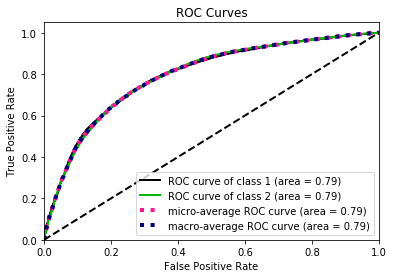

In [10]:
skplt.metrics.plot_roc_curve(y_test, y_prob)
plt.show()